In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('car_price_prediction.csv')
df

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,2497,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,2498,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,2499,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5


In [3]:
df.drop(columns='Car ID' , inplace=True)

In [4]:
#Exploratory Data Analysis

In [5]:
df['Brand'].value_counts().sort_index()

Audi        368
BMW         358
Ford        347
Honda       352
Mercedes    353
Tesla       348
Toyota      374
Name: Brand, dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

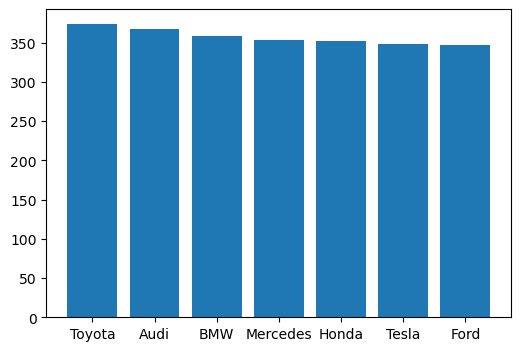

In [7]:
plt.figure(figsize=(6,4))
plt.bar(x=df['Brand'].value_counts().index, height=df['Brand'].value_counts().values)
plt.show()

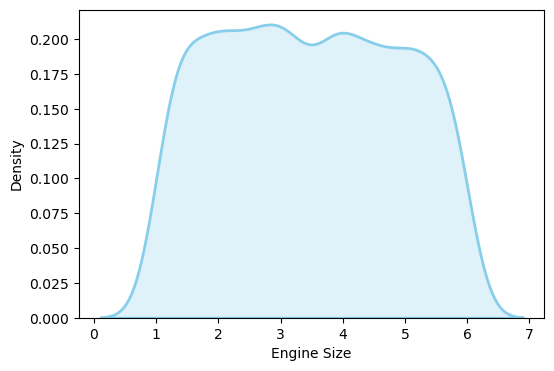

In [8]:
plt.figure(figsize=(6, 4))
sns.kdeplot(df['Engine Size'], fill=True, color='skyblue', linewidth=2)
plt.show()

In [9]:
df['Fuel Type'].value_counts()

Diesel      655
Petrol      630
Electric    614
Hybrid      601
Name: Fuel Type, dtype: int64

<BarContainer object of 4 artists>

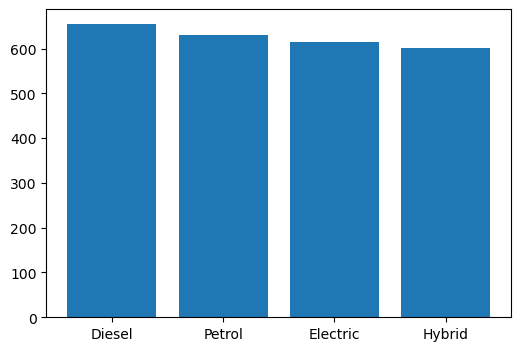

In [10]:
plt.figure(figsize=(6,4))
plt.bar(x= df['Fuel Type'].value_counts().index,height=df['Fuel Type'].value_counts().values)

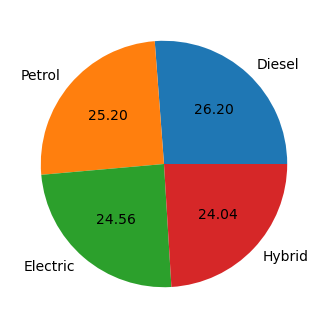

In [11]:
plt.figure(figsize=(6,4))
plt.pie(df['Fuel Type'].value_counts(), autopct="%1.2f", labels=df['Fuel Type'].value_counts().index)
plt.show()

In [12]:
df['Transmission'].value_counts()

Manual       1308
Automatic    1192
Name: Transmission, dtype: int64

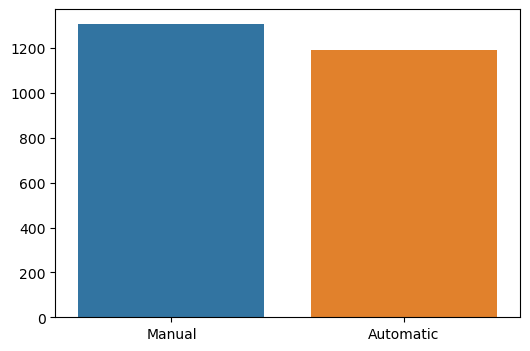

In [13]:
plt.figure(figsize=(6,4))
bar = sns.barplot(x=df['Transmission'].value_counts().index,y=df['Transmission'].value_counts().values)
plt.show()

In [14]:
df['Condition'].value_counts()

Used        855
Like New    836
New         809
Name: Condition, dtype: int64

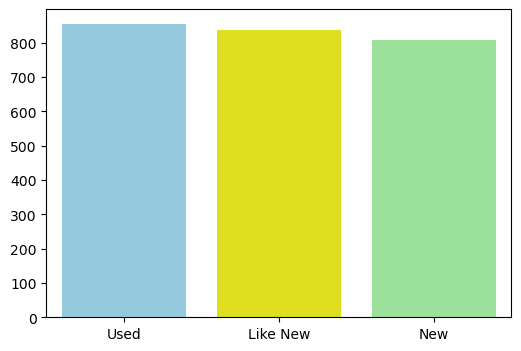

In [15]:
plt.figure(figsize=(6,4))
bar = sns.barplot(x=df['Condition'].value_counts().index,y=df['Condition'].value_counts().values,palette=['skyblue', 'yellow', 'lightgreen'])
plt.show()

In [16]:
df['Price'].mean()

52638.022532

In [17]:
df['Model'].value_counts()

Fiesta      103
Corolla     103
A3           98
A4           96
CR-V         95
Q7           95
5 Series     93
Model X      93
Prius        93
3 Series     93
X3           92
GLA          92
C-Class      92
Camry        90
E-Class      89
Model Y      89
Fit          89
RAV4         88
Accord       88
Model 3      87
Explorer     86
Focus        81
GLC          80
Civic        80
X5           80
Model S      79
Q5           79
Mustang      77
Name: Model, dtype: int64

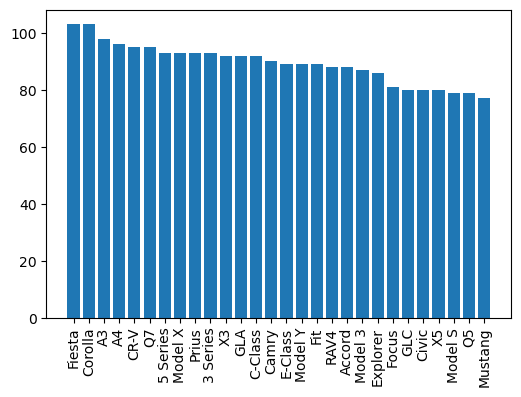

In [18]:
plt.figure(figsize=(6,4))
plt.bar(x=df['Model'].value_counts().index,height=df['Model'].value_counts().values)
plt.xticks(rotation=90)
plt.show()

In [19]:
# DATA Preprocessing

# 1- Data Encoding

In [20]:
#2- Spletting

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
encoder = LabelEncoder()

In [23]:
def dataEncoding(columnName):
    df[columnName]=encoder.fit_transform(df[columnName])

In [24]:
for i in list(df.columns.values):
    if i not in ['Year','Engine Size','Mileage','Price']:
        dataEncoding(i)

In [25]:
X = df.drop(columns= 'Price', axis=1)
Y = df[['Price']]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, x_test, y_train, y_test = train_test_split(X, np.array(Y), test_size= 0.3, random_state= 42)

In [28]:
# Data Modelling

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import Lasso 
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.svm import SVR

In [30]:
linearRegressionModel = LinearRegression()

In [31]:
linearRegressionModel.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = linearRegressionModel.predict(x_test)

In [33]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [34]:
meanAbsError = mean_absolute_error(y_test, y_pred)
meanSquaredError = mean_squared_error(y_test, y_pred)
print('The MAE Is:',meanAbsError, "\nThe RMSE is:", np.sqrt(meanSquaredError))

The MAE Is: 23849.37634190837 
The RMSE is: 27562.52299823636


In [35]:
# Decision Tree Regressor

In [36]:
DTRM = DecisionTreeRegressor(random_state = 42)

In [37]:
DTRM.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [38]:
DTy_pred = DTRM.predict(x_test)

In [39]:
DTmeanAbsError = mean_absolute_error(y_test, DTy_pred)
DTmeanSquaredError = mean_squared_error(y_test, DTy_pred)

In [40]:
print('The MAE Is:',DTmeanAbsError, "\nThe RMSE is:", np.sqrt(DTmeanSquaredError))

The MAE Is: 31619.224466666663 
The RMSE is: 38652.29750705139


In [41]:
# Random Forest Regressor

In [42]:
RFR = RandomForestRegressor(random_state = 42, n_estimators = 100)

In [43]:
RFR.fit(X_train, y_train.reshape(-1))

RandomForestRegressor(random_state=42)

In [44]:
RF_Y_pred = RFR.predict(x_test)

In [45]:
RFmeanAbsError = mean_absolute_error(y_test,RF_Y_pred)
RFmeanSquaredError = mean_squared_error(y_test,RF_Y_pred)

In [46]:
print('The MAE Is:',RFmeanAbsError,"\nThe RMSE is:", np.sqrt(RFmeanSquaredError))

The MAE Is: 24297.157830266664 
The RMSE is: 28274.03287367335


In [47]:
# Lasso Regression Model

In [48]:
LassoRegressionModel = Lasso(random_state=42)

In [49]:
LassoRegressionModel.fit(X_train,y_train)

Lasso(random_state=42)

In [50]:
LS_y_pred = LassoRegressionModel.predict(x_test)

In [51]:
LSmeanAbsError = mean_absolute_error(y_test, LS_y_pred)
LSmeanSquaredError = mean_squared_error(y_test,LS_y_pred)

In [52]:
print('The MAE Is:',LSmeanAbsError, "\nThe RMSE is:", np.sqrt(LSmeanSquaredError))

The MAE Is: 23849.34078677307 
The RMSE is: 27562.385414233744


In [53]:
# SVR Regression

In [54]:
SVRmodel = SVR()

In [55]:
SVRmodel.fit(X_train,y_train.reshape(-1))

SVR()

In [56]:
SVR_y_pred = SVRmodel.predict(x_test)

In [57]:
SVRmeanAbsError = mean_absolute_error(y_test,SVR_y_pred)
SVRmeanSquiredError = mean_squared_error(y_test,SVR_y_pred)

In [58]:
print('The MAE Is:',SVRmeanAbsError,"\nThe RMSE is:",np.sqrt(SVRmeanSquiredError))

The MAE Is: 23927.699218385656 
The RMSE is: 27527.629687904948


In [59]:
# Data Scaling

In [60]:
XNew = df[['Brand','Year','Engine Size','Fuel Type', 'Transmission','Mileage','Condition','Model']]
YNew = df[['Price']]

In [61]:
scaler = StandardScaler()

In [62]:
XNew = scaler.fit_transform(XNew)

In [63]:
XNew = pd.DataFrame(XNew, columns=['Brand','Year','Engine Size','Fuel Type','Transmission','Mileage','Condition','Model',])

In [64]:
X_train,x_test,y_train,y_test = train_test_split(XNew,YNew,random_state=42,test_size=0.2)

In [65]:
LRModel = LinearRegression()

In [66]:
LRModel.fit(X_train,y_train)

LinearRegression()

In [67]:
y_pred = LRModel.predict(x_test)

In [68]:
LRMAE = mean_absolute_error(y_test, y_pred)
LRRMSE = np.sqrt(mean_absolute_error(y_test, y_pred))

In [69]:
print(LRMAE, LRRMSE)

23692.564222638593 153.92389100668743


In [71]:
import pickle
with open('car_price_model.pkl', 'wb') as f:
    pickle.dump(LRModel, f)